<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Sesiones/Sesion_11_SVM_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea 11.1 
1. Implementar un SVM para clasificar los siguientes datasets: make_moons, make_circles y make_bloobs, para ello se deberá crear un grid search. 

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Datasets
datasets = {
    "moons": make_moons(n_samples=200, noise=0.1, random_state=1),
    "circles": make_circles(n_samples=200, noise=0.1, random_state=1),
    "blobs": make_blobs(n_samples=200, centers=2, random_state=1)
}

# Grid Search parameters
param_grid = {'kernel': ('linear', 'rbf', 'poly'), 'C': [0.01, 0.1, 1, 10, 100]}

# Train and evaluate each dataset
best_estimators = {}
for name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    grid_search = GridSearchCV(SVC(), param_grid, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_:.3f}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Best parameters for moons: {'C': 1, 'kernel': 'rbf'}
Best score for moons: 0.994
Best parameters for circles: {'C': 100, 'kernel': 'rbf'}
Best score for circles: 0.844
Best parameters for blobs: {'C': 0.01, 'kernel': 'linear'}
Best score for blobs: 1.000


2. Con los mejores párametros dibujar  las fronteras de clasificación

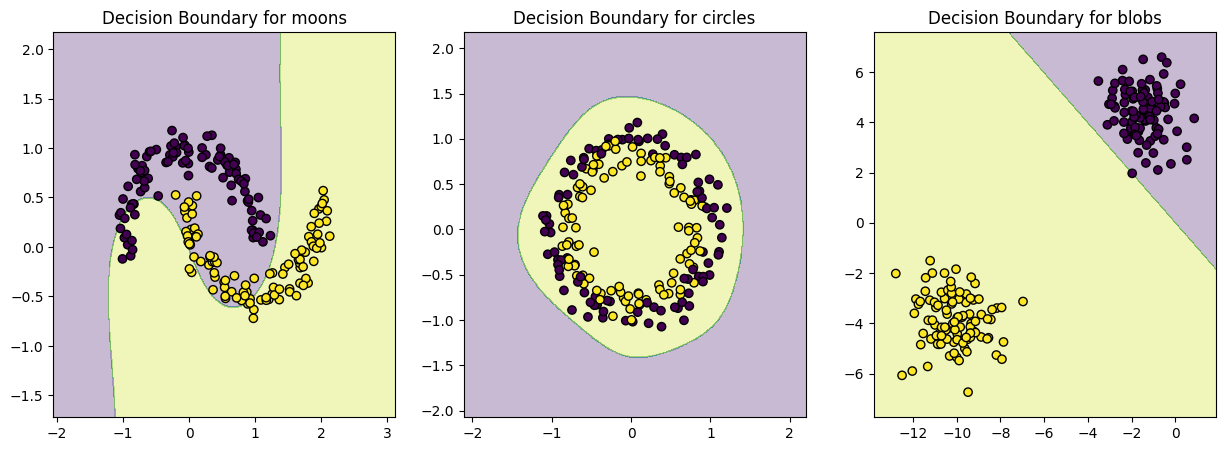

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, (name, (X, y)) in zip(axs, datasets.items()):
    plot_decision_boundaries(X, y, best_estimators[name], ax)
    ax.set_title(f"Decision Boundary for {name}")
plt.show()

3. Con los mejores parámetros dibujar la matriz de confusion 

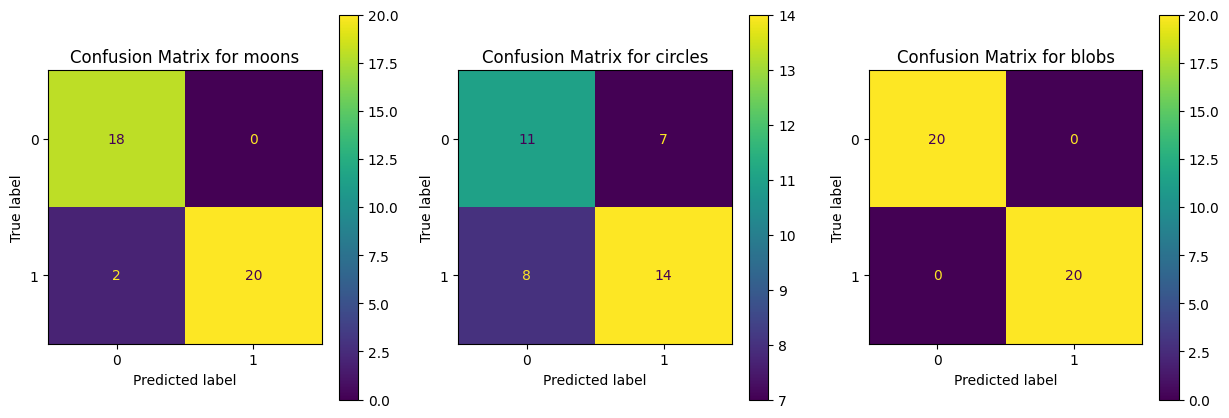

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, (name, (X, y)) in zip(axs, datasets.items()):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test)
    
    y_pred = best_estimators[name].predict(X_test_scaled)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
    ax.set_title(f"Confusion Matrix for {name}")
plt.show()